In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Jacobi Method
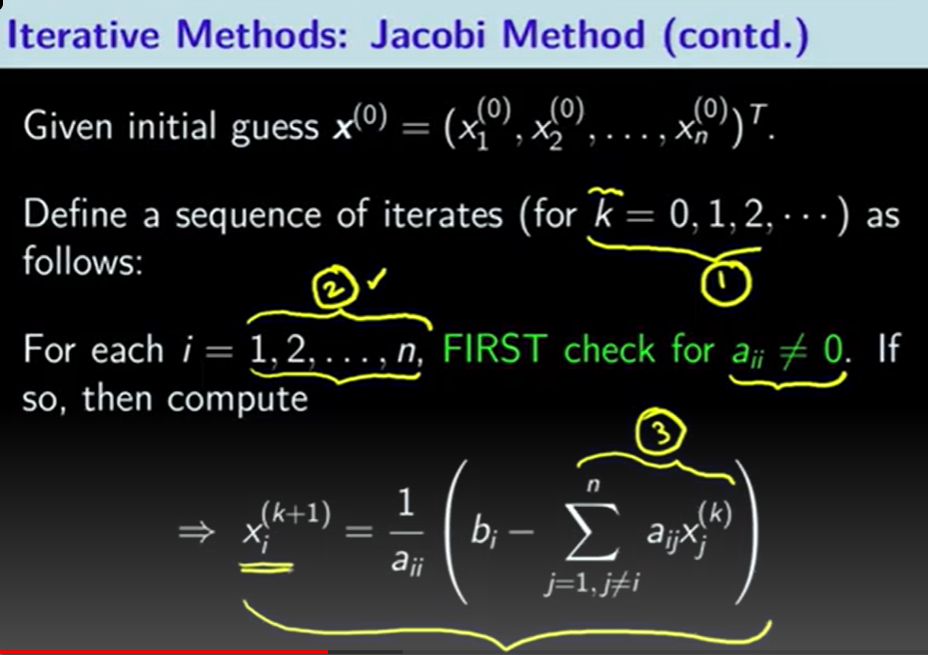


Approximate solution after 150 iterations = [ 2.45448582e-04  3.18664440e-05 -1.55028328e-04]
L^2 error = 0.00029205180926995556


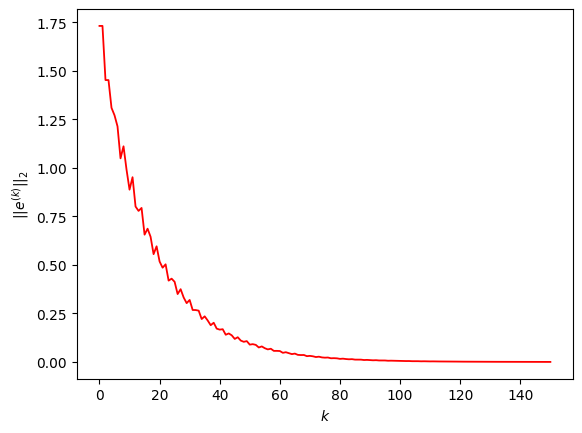

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1.0, 0.0, 1.0],       #x1 + 0*x2 + x3 = 0
              [-1.0, 1.0, 0.0],      #-x1 + x2 + 0*x3 = 0
              [1.0, 2.0, -3.0]])     #x1 + 2*x2 - 3*x3 = 0
b = np.array ([0.0, 0.0, 0.0])
x = np.array ([1.0, 1.0, 1.0])       # x^(0) = [1, 1, 1]
N = 150                         #number of iterations 

n = len(b)
Indicator = 1

#check if diagonal elements are non-zero
for i in range(0,n):
    if A[i][i]==0:
        print("ERROR: Jacobi iteration failed!")
        Indicator = 0
        
if Indicator:      #runs only when Indicator = 1
    for k in range(0,N):                  #For iterations loop
        x = np.vstack([x, [0]*n])         #creating memory for x^(k), initialising as [0, 0, 0]
        
        for i in range(0,n):              # for all elements of each component of x^(i)
            x[k+1][i] = b[i]
            
            for j in range(0,n):          # RHS sum on RHS
                if j!=i:
                    x[k+1][i] = x[k+1][i] - A[i][j]*x[k][j]
                    
            x[k+1][i] = x[k+1][i]/A[i][i]
    print("Approximate solution after "+ str(N)+ " iterations = "+str(x[N]))
    
# CALCULATING ERROR
    err12 = [0]*(N+1)
    for k in range (0,N+1):
        for i in range(0,n):
            err12[k] = err12[k] + x[k][i]**2
        err12[k] = np.sqrt(err12[k])
    print("L^2 error = "+ str(err12[N]))

# PLOTTING
xaxis = list(range(0,N+1))
plt.plot(xaxis, err12, color ='red', linestyle = "-", linewidth = '1.3')
plt.xlabel('$k$')
plt.ylabel('$||e^{(k)}||_2$')
plt.show()



GAUSS - SIDEL METHOD
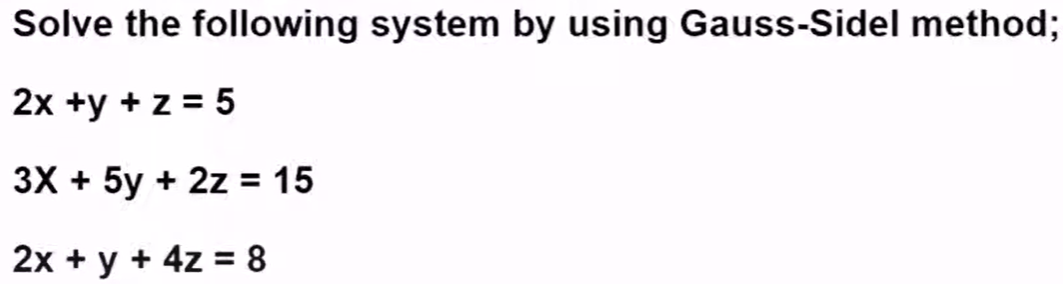

In [3]:
import numpy as np

f1 = lambda x,y,z: (5-y-z)/2
f2 = lambda x,y,z: (15-3*x-2*z)/5
f3 = lambda x,y,z: (8-2*x-y)/4

e = 0.001
iteration = 0

x0 = 0
y0 = 0 
z0 = 0

condition = True
while condition:
    x1 = f1(x0, y0, z0)
    y1 = f2(x1, y0, z0)
    z1 = f3(x1, y1, z0)
    
    e1 = abs(x0 - x1)
    e2 = abs(y0 - y1)
    e3 = abs(z0 - z1)
    
    iteration += 1
    
    x0 = x1
    y0 = y1
    z0 = z1
    
    condition = e1>e and e2>e and e3>e
print("The value of x, y, z are " + str(x1) + ", " + str(y1) + ", " + str(z1) + " respectively in " + str(iteration) + " iterations.")


The value of x, y, z are 0.9992655950927734, 2.00065091784668, 1.0002044729919433 respectively in 7 iterations.
